# EDA FOR THE DATASET


​The "Madrid restaurants" dataset on Kaggle, is the dataset that we created as seen in the previous steps that provides comprehensive information about various dining establishments in Madrid, Spain.

This dataset includes details such as restaurant names, locations, cuisines offered, average ratings, and pricing information. It serves as a valuable resource for data analysis projects related to the culinary landscape of Madrid, enabling users to explore patterns and trends within the city's restaurant scene.

Now we will do an in depth eda to gain a better understanding of what the data is and what aspects does it cover.




### Step 0: Load imports


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import ast
import warnings
warnings.filterwarnings("ignore")
import plotly.io as pio


### Step 1: Load the Dataset from Directory 


In [8]:
# Set the path to your dataset folder
data_path = "../data/"

# Load each CSV into a DataFrame
df_ratings = pd.read_csv(data_path + "ratings.csv")
df_restaurants = pd.read_csv(data_path + "restaurants.csv")
df_sentiment = pd.read_csv(data_path + "review_sentiment.csv")

### Step 2: Preview data and preprocessing 


In [9]:
# Preview the data
print("Ratings:")
display(df_ratings.head())



Ratings:


user_id                restaurant_id rating  \
0        1  ChIJaZxVboEoQg0R2Xyk4VBN6QA      5   
1        2  ChIJaZxVboEoQg0R2Xyk4VBN6QA      5   
2        3  ChIJaZxVboEoQg0R2Xyk4VBN6QA      5   
3        4  ChIJaZxVboEoQg0R2Xyk4VBN6QA      5   
4        5  ChIJ189rc3soQg0R7l7WUa5fgo8      3   

                                         review_text        date  \
0  As soon as you step inside, you’re enveloped i...  2024-12-19   
1  If you can afford the place, it is well worth ...  2024-09-30   
2  The CEBO offers excellent creative and yet “Sp...  2025-02-07   
3  Amazing experience. We had the 16 course tasti...  2024-06-14   
4  When in Madrid. That’s me, I’m in Madrid. Grea...  2025-03-08   

          source_user_name  
0  Melissa Pedroso-Pearson  
1          Guillaume Slama  
2                Martin MD  
3                    Ju Do  
4                Alex Yang

`ratings.csv`

Purpose:
Includes **user-submitted reviews and ratings** for each restaurant.

🧾 Key Columns:
| Column             | Description                                                         |
|--------------------|---------------------------------------------------------------------|
| `user_id`          | Unique user ID                                                      |
| `restaurant_id`    | Foreign key linking to `restaurants.csv`                            |
| `rating`           | User rating (e.g., 1–5 stars)                                       |
| `review_text`      | Full textual review                                                 |
| `date`             | Date the review was posted                                          |
| `source_user_name` | Name or alias of the reviewer                                       |

Why it matters:


Captures the **subjective experiences** of users — useful for NLP, trends, and quality insights. This dataset is essential for training **collaborative filtering** models. It helps the chatbot understand **what similar users liked**, enabling it to suggest restaurants based on user preferences and behaviors. It also supports **popularity-based** and **non-personalized recommenders** in early system stages.


In [10]:
# Preview the data
print("Restaurants:")
display(df_restaurants.head())

Restaurants:


restaurant_id                               name  \
0  ChIJaZxVboEoQg0R2Xyk4VBN6QA             CEBO Madrid Restaurant   
1  ChIJ189rc3soQg0R7l7WUa5fgo8                         El Minibar   
2  ChIJvXloBlgpQg0RTzvj3_auS9U  Restaurante Gloria Bendita Madrid   
3  ChIJcfNWJ9YnQg0RZLL0hcVboYA                 Ástor gastro-place   
4  ChIJsTMCAocoQg0R2in-xQOdPwc                    Angelita Madrid   

                                             address  location_lat  \
0  Cra de S. Jerónimo, 34, Centro, 28014 Madrid, ...     40.416360   
1  C/ del Mesón de Paños, 1, Centro, 28013 Madrid...     40.416334   
2  Calle de Santiago, 3, Centro, 28013 Madrid, Spain     40.416106   
3    C. del Almendro, 9, Centro, 28005 Madrid, Spain     40.412688   
4     C. de la Reina, 4, Centro, 28004 Madrid, Spain     40.420361   

   location_lng            primary_type  price_level  rating  \
0     -3.698630  Fine Dining Restaurant            0     4.7   
1     -3.709191                     Bar            0     4.7   
2     -3.709947              Restaurant            0     4.6   
3     -3.709565              Restaurant            0     4.9   
4     -3.700395                     Bar            0     4.7   

                                          attributes  
0  {"dineIn":true,"takeout":false,"delivery":fals...  
1  {"dineIn":true,"takeout":false,"delivery":fals...  
2  {"dineIn":true,"takeout":true,"delivery":false...  
3  {"dineIn":true,"takeout":false,"delivery":fals...  
4  {"dineIn":true,"takeout":false,"delivery":fals...

`restaurants.csv`

Purpose:
Contains **metadata** for each restaurant including location, type, and rating.

Key Columns:
| Column           | Description                                                                 |
|------------------|-----------------------------------------------------------------------------|
| `restaurant_id`  | Unique identifier for the restaurant (used for joins)                       |
| `name`           | Name of the restaurant                                                      |
| `address`        | Full address                                                                |
| `location_lat`   | Latitude coordinate                                                         |
| `location_lng`   | Longitude coordinate                                                        |
| `primary_type`   | Category (e.g., Restaurant, Bar, Fine Dining)                               |
| `price_level`    | Numeric indicator of cost (0 = low, 4 = high)                               |
| `rating`         | Average rating from users                                                   |
| `attributes`     | JSON-style string with flags like `dine_in`, `takeout`, `delivery`, etc.   |

Why it matters:


Serves as the **core dataset**, more like the **knowledge base** from which the chatbot draws information when responding to user queries like “Find me a fine dining place in Centro with delivery.” It enables **context-aware** filtering and enhances the chatbot’s ability to return relevant and location-specific recommendations.



In [11]:
# Preview the data
print("Sentiment:")
display(df_sentiment.head())


Sentiment:


review_id  overall_score  overall_magnitude  food_score  service_score  \
0          1            0.7                5.0        0.90           -0.1   
1          2            0.4                5.9        0.45            0.1   
2          3            0.9                1.9        0.90            0.0   
3          4            0.9                6.6        0.90            0.9   
4          5            0.5                7.3        0.00            0.0   

   value_score  ambiance_score language          emotions  \
0          0.0             0.9       en  ["satisfaction"]   
1          0.8            -0.1       en   ["contentment"]   
2          0.0             0.0       en           ["joy"]   
3          0.0             0.0       en           ["joy"]   
4          0.0             0.9       en   ["contentment"]   

                 restaurant_id  user_id  
0  ChIJaZxVboEoQg0R2Xyk4VBN6QA        1  
1  ChIJaZxVboEoQg0R2Xyk4VBN6QA        2  
2  ChIJaZxVboEoQg0R2Xyk4VBN6QA        3  
3  ChIJaZxVboEoQg0R2Xyk4VBN6QA        4  
4  ChIJ189rc3soQg0R7l7WUa5fgo8        5

`review_sentiment.csv`

Purpose:
Provides **preprocessed sentiment scores** for each review based on NLP.

Key Columns:
| Column             | Description                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| `review_id`        | Links to reviews in `ratings.csv`                                           |
| `overall_score`    | General sentiment (0–1, higher = more positive)                             |
| `overall_magnitude`| Strength of emotion in the review                                           |
| `food_score`       | Sentiment toward food                                                       |
| `service_score`    | Sentiment toward service                                                    |
| `value_score`      | Sentiment about value for money                                             |
| `ambiance_score`   | Sentiment about ambiance/environment                                        |
| `language`         | Language of the review                                                      |
| `emotions`         | Detected emotion(s) (e.g., `["joy"]`, `["contentment"]`)                    |

Why it matters:


Enables deep insights into **emotional tone**, supporting dashboards, emotion trends, and machine learning.
These scores enable **natural language understanding**. The chatbot can use sentiment insights to:
- Justify recommendations (“This place has great ambiance and service based on user sentiment.”)
- Personalize responses emotionally (“You're looking for joy-inducing spots? I’ve got just the place.”)
- Handle user queries about vibe, atmosphere, or specific aspects like food vs. service quality.

How They Work Together:

| Chatbot Feature/Use Case             | `restaurants.csv` | `ratings.csv` | `review_sentiment.csv` |
|-------------------------------------|-------------------|---------------|-------------------------|
| Location-based restaurant search     | ✅                 |               |                         |
| Popular/trending recommendations     | ✅                 | ✅             |                         |
| Collaborative filtering recommendations |                  | ✅             |                         |
| Sentiment-aware suggestions          | ✅                 | ✅             | ✅                       |
| Emotion-based queries (“happy place”) |                   | ✅             | ✅                       |
| Context-aware replies (e.g., family-friendly with ambiance) | ✅ | ✅     | ✅                       |

In [12]:
print("=== Restaurants ===")
print("Shape:", df_restaurants.shape)
display(df_restaurants.info())
print("\nMissing values:\n", df_restaurants.isnull().sum())


=== Restaurants ===
Shape: (580, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   restaurant_id  580 non-null    object 
 1   name           580 non-null    object 
 2   address        580 non-null    object 
 3   location_lat   580 non-null    float64
 4   location_lng   580 non-null    float64
 5   primary_type   578 non-null    object 
 6   price_level    580 non-null    int64  
 7   rating         580 non-null    float64
 8   attributes     580 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 40.9+ KB


None


Missing values:
 restaurant_id    0
name             0
address          0
location_lat     0
location_lng     0
primary_type     2
price_level      0
rating           0
attributes       0
dtype: int64


We will also drop price level as its has to many missing values and very spars in general

In [13]:
df_restaurants.drop(columns=['price_level'], inplace=True)


In [14]:
print("=== Ratings ===")
print("Shape:", df_ratings.shape)
display(df_ratings.info())
print("\nMissing values:\n", df_ratings.isnull().sum())


=== Ratings ===
Shape: (2153, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           2153 non-null   int64 
 1   restaurant_id     2153 non-null   object
 2   rating            2153 non-null   object
 3   review_text       2152 non-null   object
 4   date              2153 non-null   object
 5   source_user_name  2153 non-null   object
dtypes: int64(1), object(5)
memory usage: 101.1+ KB


None


Missing values:
 user_id             0
restaurant_id       0
rating              0
review_text         1
date                0
source_user_name    0
dtype: int64


In [15]:
print("=== Sentiment ===")
print("Shape:", df_sentiment.shape)
display(df_sentiment.info())
print("\nMissing values:\n", df_sentiment.isnull().sum())


=== Sentiment ===
Shape: (1700, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          1700 non-null   int64  
 1   overall_score      1700 non-null   float64
 2   overall_magnitude  1700 non-null   float64
 3   food_score         1700 non-null   float64
 4   service_score      1700 non-null   float64
 5   value_score        1700 non-null   float64
 6   ambiance_score     1700 non-null   float64
 7   language           1700 non-null   object 
 8   emotions           1700 non-null   object 
 9   restaurant_id      1700 non-null   object 
 10  user_id            1700 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 146.2+ KB


None


Missing values:
 review_id            0
overall_score        0
overall_magnitude    0
food_score           0
service_score        0
value_score          0
ambiance_score       0
language             0
emotions             0
restaurant_id        0
user_id              0
dtype: int64


Upon inspecting the structure of the three datasets — restaurants.csv, ratings.csv, and review_sentiment.csv — we observe that each file is well-structured and mostly complete, making them suitable for further analysis and modeling. The restaurants.csv dataset contains 580 entries with key metadata about restaurants such as name, location, category, rating, and service attributes. It has only 2 missing values in the primary_type column, which can be easily handled. The ratings.csv dataset contains 2,153 user reviews, including user and restaurant IDs, star ratings, and review text. It has just 1 missing value in the review_text column, indicating a very clean dataset overall. Finally, the review_sentiment.csv file, which holds sentiment analysis results for each review, is complete with 2,152 entries and no missing values. These results confirm that all three datasets are in good condition for merging, exploration, and feature engineering in the context of building a context-aware chatbot-based restaurant recommendation system.

In [16]:
# Convert date column
df_ratings['date'] = pd.to_datetime(df_ratings['date'], errors='coerce')
print("Date column converted to datetime.")

Date column converted to datetime.


Removing duplicate from rows

In [17]:
df_restaurants.drop_duplicates(subset=['restaurant_id', 'name', 'address'], inplace=True)
df_ratings.drop_duplicates(inplace=True)
df_sentiment.drop_duplicates(inplace=True)
print("Duplicates removed.")


Duplicates removed.


Missing Values

In [18]:
# Drop rows with missing values (e.g., missing primary_type or review_text)
df_restaurants.dropna(subset=['primary_type'], inplace=True)
df_ratings.dropna(subset=['review_text'], inplace=True)
df_ratings.dropna(subset=['date'], inplace=True)
print("Missing values removed.")



Missing values removed.


In [19]:
# Check remaining missing values in each DataFrame
print("=== Missing values in df_restaurants ===")
print(df_restaurants.isnull().sum())

print("\n=== Missing values in df_ratings ===")
print(df_ratings.isnull().sum())

print("\n=== Missing values in df_sentiment ===")
print(df_sentiment.isnull().sum())

=== Missing values in df_restaurants ===
restaurant_id    0
name             0
address          0
location_lat     0
location_lng     0
primary_type     0
rating           0
attributes       0
dtype: int64

=== Missing values in df_ratings ===
user_id             0
restaurant_id       0
rating              0
review_text         0
date                0
source_user_name    0
dtype: int64

=== Missing values in df_sentiment ===
review_id            0
overall_score        0
overall_magnitude    0
food_score           0
service_score        0
value_score          0
ambiance_score       0
language             0
emotions             0
restaurant_id        0
user_id              0
dtype: int64


In [20]:
print("=== Restaurants ===")
print(f"Shape: {df_restaurants.shape[0]} rows × {df_restaurants.shape[1]} columns\n")
print("=== Ratings ===")
print(f"Shape: {df_ratings.shape[0]} rows × {df_ratings.shape[1]} columns\n")
print("=== Sentiment ===")
print(f"Shape: {df_sentiment.shape[0]} rows × {df_sentiment.shape[1]} columns\n")


=== Restaurants ===
Shape: 578 rows × 8 columns

=== Ratings ===
Shape: 2120 rows × 6 columns

=== Sentiment ===
Shape: 1700 rows × 11 columns



### Step 3: Basic exploration




=== Basic Stats: Ratings ===


user_id
count  2120.000000
mean    945.990566
std     566.106404
min       1.000000
25%     457.750000
50%     934.500000
75%    1433.250000
max    1954.000000

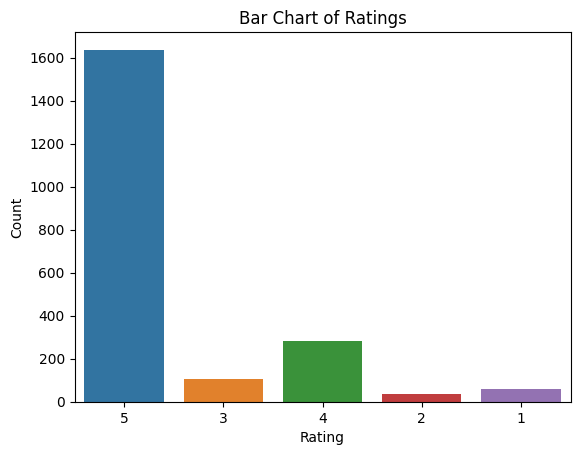

In [21]:
print("\n=== Basic Stats: Ratings ===")
display(df_ratings.describe())

sns.countplot(x='rating', data=df_ratings)
plt.title("Bar Chart of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

The rating distribution in our dataset is heavily skewed towards high values, with the vast majority of users assigning a score of 5, and significantly fewer ratings of 1 to 3. This indicates a strong positive bias, which is common in user-generated restaurant reviews where customers are more inclined to rate only if they had an exceptionally good experience. While this is encouraging for general satisfaction, it poses a challenge for building a nuanced recommendation system, as the lack of variability in ratings makes it harder to distinguish between moderately good and truly outstanding restaurants. For our recomendation system application, this insight suggests the need to go beyond numerical ratings by incorporating follow-up questions related to specific aspects like food, service, and ambiance to better understand user preferences, which are part of the impicit data. Additionally, we may consider grouping ratings into broader sentiment categories (positive, neutral, negative) to support a more meaningful recommendation dialogue and improve model robustness, especially in cold start scenarios.


=== Basic Stats: Sentiment Scores ===


review_id  overall_score  overall_magnitude   food_score  \
count  1700.000000    1700.000000        1700.000000  1700.000000   
mean   1044.941176       0.589235           3.552765     0.502463   
std     609.693378       0.397130           1.967580     0.476008   
min       1.000000      -0.900000           0.000000    -0.800000   
25%     504.750000       0.500000           2.200000     0.000000   
50%    1041.500000       0.700000           3.300000     0.800000   
75%    1580.250000       0.900000           4.600000     0.900000   
max    2101.000000       0.900000          26.400000     0.900000   

       service_score  value_score  ambiance_score      user_id  
count    1700.000000  1700.000000     1700.000000  1700.000000  
mean        0.392562     0.155132        0.173743   927.461765  
std         0.485406     0.367950        0.360824   568.098448  
min        -0.900000    -0.900000       -0.800000     1.000000  
25%         0.000000     0.000000        0.000000   427.750000  
50%         0.300000     0.000000        0.000000   911.500000  
75%         0.900000     0.000000        0.000000  1408.250000  
max         0.900000     0.900000        0.900000  1954.000000

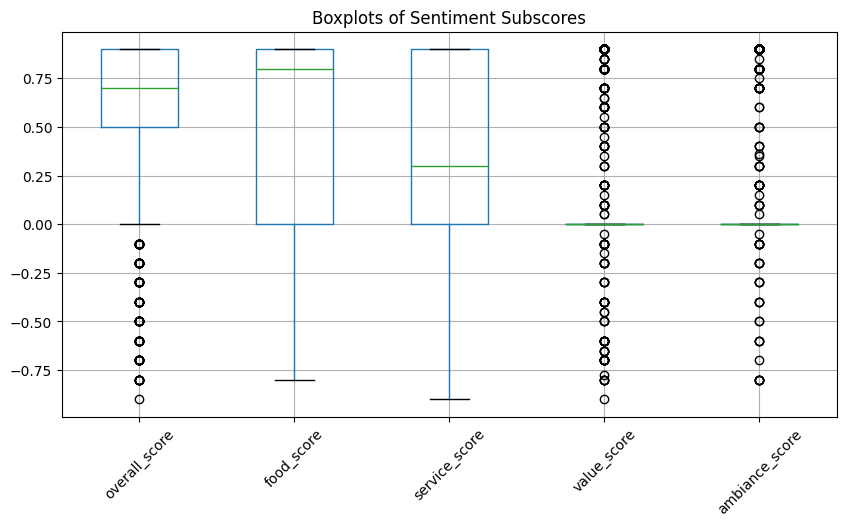

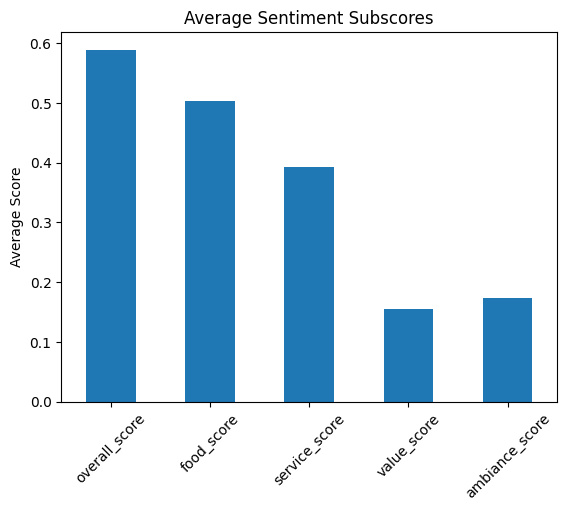

In [22]:
print("\n=== Basic Stats: Sentiment Scores ===")
display(df_sentiment.describe())
sentiment_scores = ['overall_score', 'food_score', 'service_score', 'value_score', 'ambiance_score']
df_sentiment[sentiment_scores].boxplot(figsize=(10,5))
plt.title("Boxplots of Sentiment Subscores")
plt.xticks(rotation=45)
plt.show()

df_sentiment[sentiment_scores].mean().plot(kind='bar')
plt.title("Average Sentiment Subscores")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

First, the boxplot of sentiment subscores reveals that users tend to rate food quality and overall experience most positively, with median values for both hovering close to the upper bound of the scale. However, value and ambiance show a wider spread of responses, with many users expressing dissatisfaction—evidenced by the lower medians and presence of significant outliers. This suggests that while most users appreciate the core dining experience, pricing and environmental factors are more polarizing.

Second, the bar chart of average sentiment subscores reinforces these findings quantitatively: overall and food scores rank highest on average, followed by service, while value and ambiance fall behind.

For a recommender system, this implies that prioritizing food quality and service in filtering or ranking logic will align with what users care about most. Additionally, incorporating sentiment variance (e.g., low value or ambiance) into the model could help diversify recommendations by suggesting restaurants that fill specific gaps—for example, places with great ambiance for users who tend to complain about it. Overall, these insights support a more nuanced and user-aligned recommendation engine.


=== Basic Stats: Restaurants ===
Numerical Overview:


location_lat  location_lng      rating
count    578.000000    578.000000  578.000000
mean      40.419890     -3.700379    4.494810
std        0.007645      0.009064    0.256913
min       40.402786     -3.718029    2.600000
25%       40.415316     -3.707623    4.400000
50%       40.419245     -3.701592    4.500000
75%       40.422685     -3.697453    4.700000
max       40.469358     -3.668364    5.000000


Categorical Overview:


restaurant_id         name  \
count                           578          578   
unique                          578          573   
top     ChIJaZxVboEoQg0R2Xyk4VBN6QA  Steakburger   
freq                              1            3   

                                                  address primary_type  \
count                                                 578          578   
unique                                                556           47   
top     Pl. de San Miguel, s/n, Centro, 28005 Madrid, ...   Restaurant   
freq                                                    3          184   

                                               attributes  
count                                                 578  
unique                                                569  
top     {"dineIn":true,"takeout":true,"delivery":true,...  
freq                                                    2

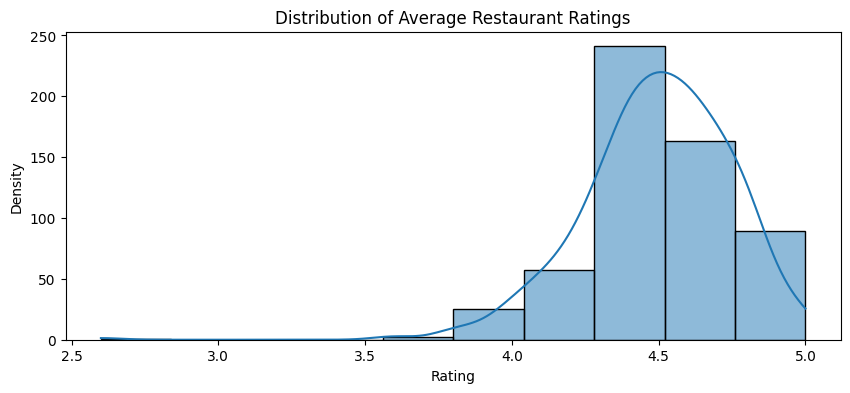

In [23]:
print("\n=== Basic Stats: Restaurants ===")
# Basic descriptive stats for numerical columns
print("Numerical Overview:")
display(df_restaurants.describe())

# Basic descriptive stats for object columns (categorical-like)
print("\nCategorical Overview:")
display(df_restaurants.describe(include=['object']))


plt.figure(figsize=(10, 4))
sns.histplot(df_restaurants['rating'], bins=10, kde=True)
plt.title("Distribution of Average Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.show()

The distribution of average restaurant ratings reveals a strong skew toward higher values, with most establishments rated between 4.0 and 5.0. This suggests that users are generally generous with their evaluations or that the platform primarily attracts higher-quality restaurants. The kernel density plot confirms a concentration of ratings around 4.5, indicating a positivity bias that must be considered when building a recommender system—especially for distinguishing truly exceptional places from those that are merely average. Complementing this, the statistical overview shows low variance in ratings across restaurants, emphasizing the importance of incorporating additional features like sentiment scores, user preferences, and metadata (e.g., dining options, cuisine types) into the recommendation engine. Relying solely on ratings may not be sufficient for nuanced personalization, so integrating other signals—such as review text, service feedback, or user interaction patterns—will enhance the recommender’s ability to provide more tailored and diverse suggestions.



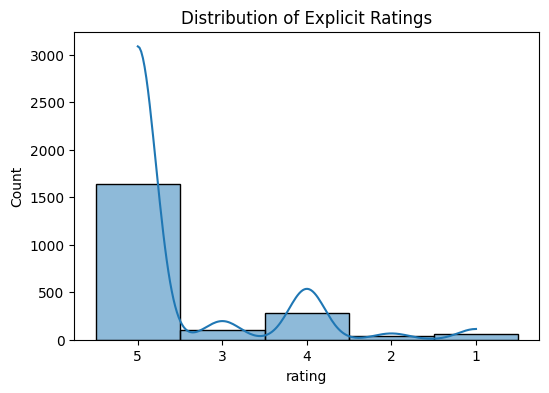

In [24]:
# 5.1 Explicit vs. Implicit Feedback
plt.figure(figsize=(6,4))
sns.histplot(df_ratings['rating'], bins=5, kde=True)
plt.title("Distribution of Explicit Ratings")
plt.show()

The distribution of explicit ratings further reinforces the earlier observation of a strong positive skew. The overwhelming majority of users provide a 5-star rating, with a sharp drop-off in lower ratings. This imbalance presents a challenge for recommendation models that rely heavily on ratings as signals, as it reduces the contrast between user preferences. In this context, relying solely on explicit feedback may lead to less discriminative recommendations.

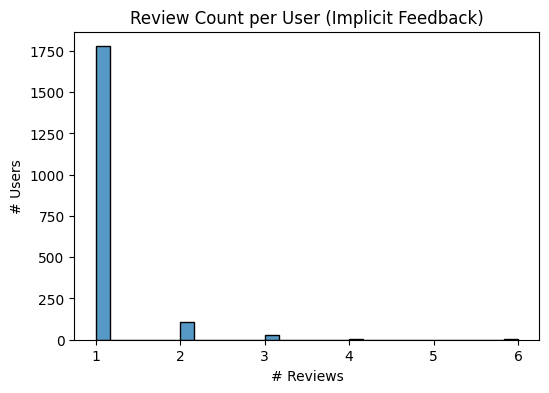

In [25]:
# Review frequency per user
user_freq = df_ratings['user_id'].value_counts()
plt.figure(figsize=(6,4))
sns.histplot(user_freq, bins=30)
plt.title("Review Count per User (Implicit Feedback)")
plt.xlabel("# Reviews")
plt.ylabel("# Users")
plt.show()

The distribution of review counts per user highlights a classic long-tail pattern common in user-generated data. Most users contribute only a single review, while a much smaller group provides multiple reviews. This has important implications for building a recommender system. For the majority of users with sparse interaction data, personalization becomes challenging—an issue known as the cold-start problem. Therefore, the system must be designed to incorporate hybrid or content-based approaches for these users. Meanwhile, frequent reviewers offer valuable implicit feedback that can be leveraged to identify behavioral trends, refine collaborative filtering models, and uncover niche preferences. Ultimately, recognizing and addressing this imbalance in user activity is essential to improve both accuracy and coverage in recommendations.


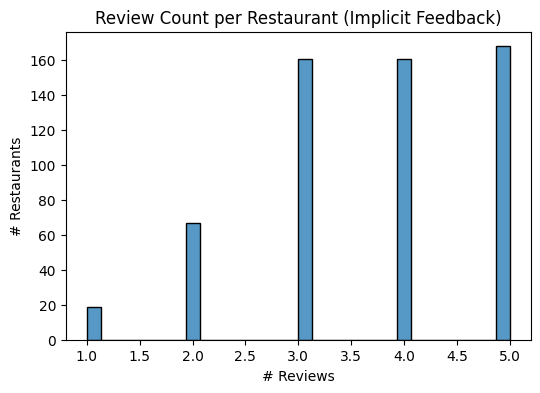

In [26]:
# Review frequency per restaurant
rest_freq = df_ratings['restaurant_id'].value_counts()
plt.figure(figsize=(6,4))
sns.histplot(rest_freq, bins=30)
plt.title("Review Count per Restaurant (Implicit Feedback)")
plt.xlabel("# Reviews")
plt.ylabel("# Restaurants")
plt.show()

The histogram of review counts per restaurant reveals that a significant portion of restaurants receive only a few reviews, while a smaller number accumulate a high volume of feedback. Techniques like item-based collaborative filtering, content-based approaches, or adjusted rating scores (e.g., Bayesian average) can help surface under-reviewed but potentially high-quality restaurants.

In [27]:
# 5. Interaction Matrix & Sparsity
num_users = df_ratings['user_id'].nunique()
num_items = df_ratings['restaurant_id'].nunique()
total_ratings = df_ratings.shape[0]
sparsity = 1 - (total_ratings / (num_users * num_items))
print(f"\nUsers: {num_users}, Restaurants: {num_items}, Total Ratings: {total_ratings}")
print(f"Sparsity of interaction matrix: {sparsity:.2%}")


Users: 1921, Restaurants: 576, Total Ratings: 2120
Sparsity of interaction matrix: 99.81%


The interaction matrix, comprising 1,921 users and 576 restaurants with a total of 2,120 ratings, exhibits a sparsity of 99.81%, indicating that only a tiny fraction of all possible user-restaurant interactions are recorded. This level of sparsity is typical in real-world recommendation systems and presents a challenge—most users have interacted with only a few restaurants, and most restaurants have limited feedback. High sparsity can reduce the effectiveness of collaborative filtering methods, which rely on overlapping user-item interactions. To overcome this, it's essential to integrate content-based features (e.g., cuisine type, attributes, sentiment) and hybrid models that enrich the user profile even when interaction data is scarce. Addressing sparsity also enables better handling of the cold-start problem for new users and restaurants.

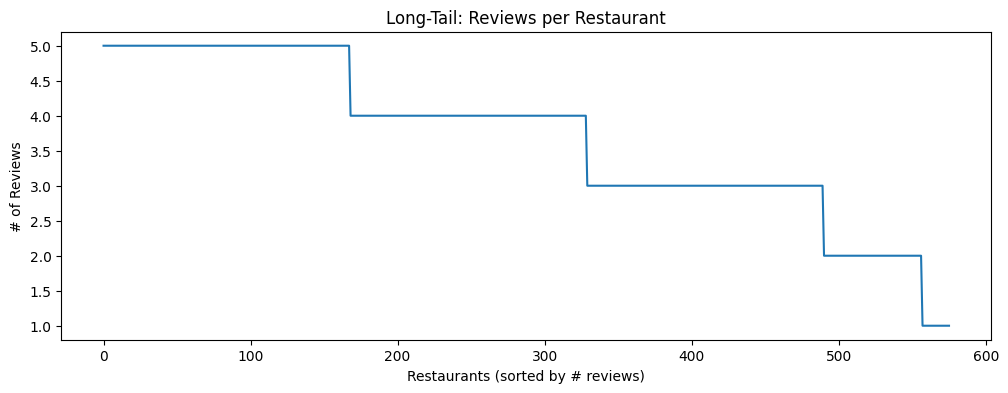

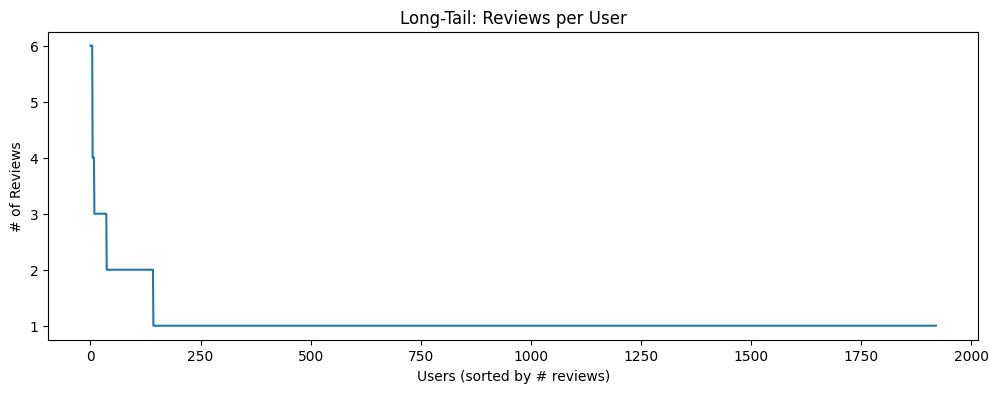

In [28]:
# 5.3 Long-Tail Distribution
sorted_rest_freq = rest_freq.sort_values(ascending=False)
plt.figure(figsize=(12,4))
sns.lineplot(data=sorted_rest_freq.reset_index(drop=True))
plt.title("Long-Tail: Reviews per Restaurant")
plt.xlabel("Restaurants (sorted by # reviews)")
plt.ylabel("# of Reviews")
plt.show()

sorted_user_freq = user_freq.sort_values(ascending=False)
plt.figure(figsize=(12,4))
sns.lineplot(data=sorted_user_freq.reset_index(drop=True))
plt.title("Long-Tail: Reviews per User")
plt.xlabel("Users (sorted by # reviews)")
plt.ylabel("# of Reviews")
plt.show()


These long-tail distribution plots reveal critical insights for recommender system design. The first chart shows that a small number of restaurants receive the majority of reviews, confirming a classic “long-tail” pattern. This suggests that while popular restaurants are frequently interacted with and well-understood by the system, many restaurants remain underrepresented. The second chart shows a similar pattern on the user side: most users have left only one or two reviews. This user-side sparsity presents a challenge for personalization, as there is limited data to understand individual preferences.

For a recommender system, these observations underscore the importance of handling data sparsity and incorporating mechanisms to mitigate the cold-start problem. Hybrid recommendation strategies—such as combining collaborative filtering with content-based filtering—may help surface relevant recommendations for lesser-known restaurants and infrequent users. Techniques like popularity-based fallback or metadata-aware suggestions (e.g., cuisine type, location) can ensure fair exposure and improved user satisfaction, even when interaction history is minimal.

In [29]:
# 5.4 Cold Start Detection
cold_users = sum(user_freq < 2)
cold_items = sum(rest_freq < 2)
print(f"\nCold-start users (<2 reviews): {cold_users}")
print(f"Cold-start restaurants (<2 reviews): {cold_items}")


Cold-start users (<2 reviews): 1778
Cold-start restaurants (<2 reviews): 19


The cold-start analysis reveals a significant challenge for recommendation systems: a majority of users (1,778) and a small number of restaurants (19) have fewer than two reviews. This high user-side cold-start presence (over 90% of users) limits the available data for collaborative filtering, increasing reliance on content-based approaches or hybrid models. Mitigating strategies such as popularity-based fallback or incorporating restaurant metadata. 

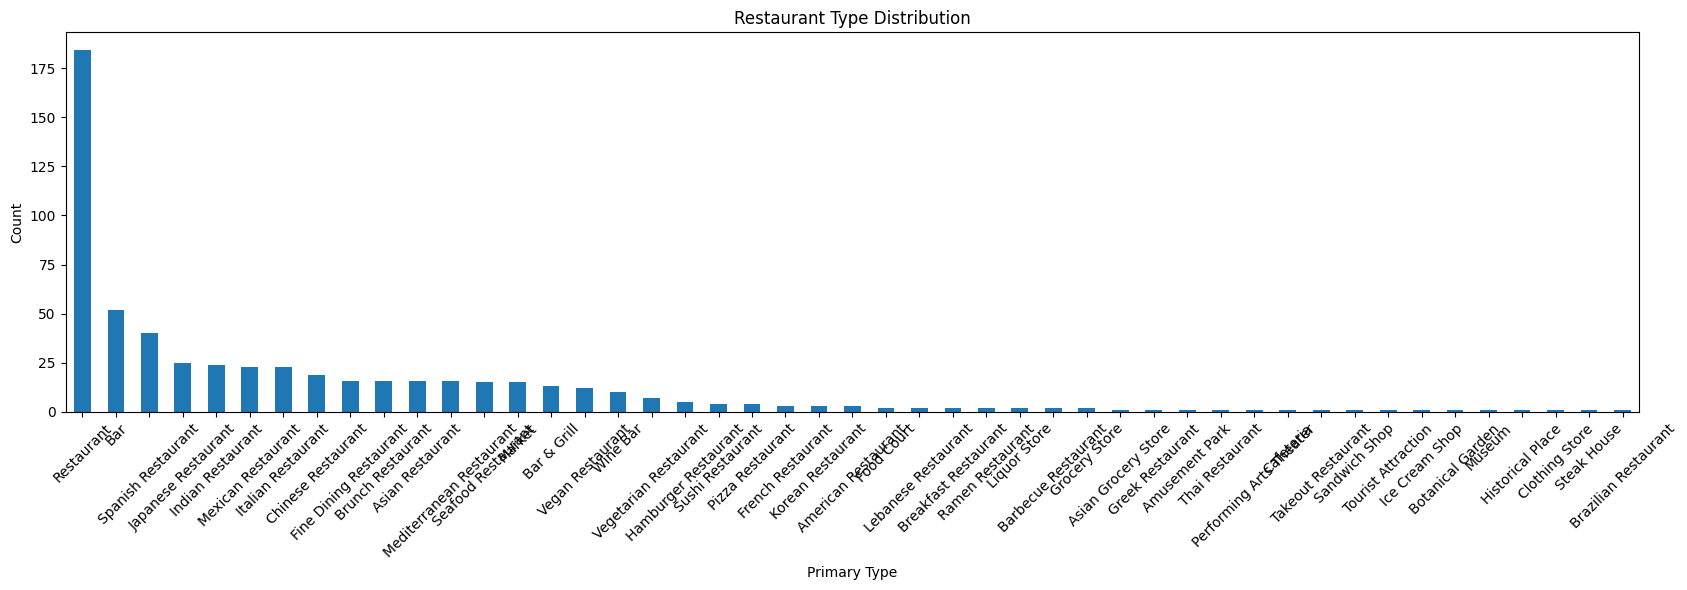

In [30]:
# Distribution of Restaurant Types
plt.figure(figsize=(17, 6))
df_restaurants['primary_type'].value_counts().plot(kind='bar')
plt.title("Restaurant Type Distribution")
plt.xlabel("Primary Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The restaurant type distribution shows that a small number of categories (like generic “Restaurant” or “Spanish Restaurant”) dominate the dataset, while others are sparsely represented. This skew can bias the recommender toward popular types unless type diversity is explicitly encouraged or balanced. Incorporating type frequency and semantic embeddings in the model could help increase variety in suggestions without sacrificing relevance. These insights are essential to design fair, robust, and inclusive recommendation strategies.

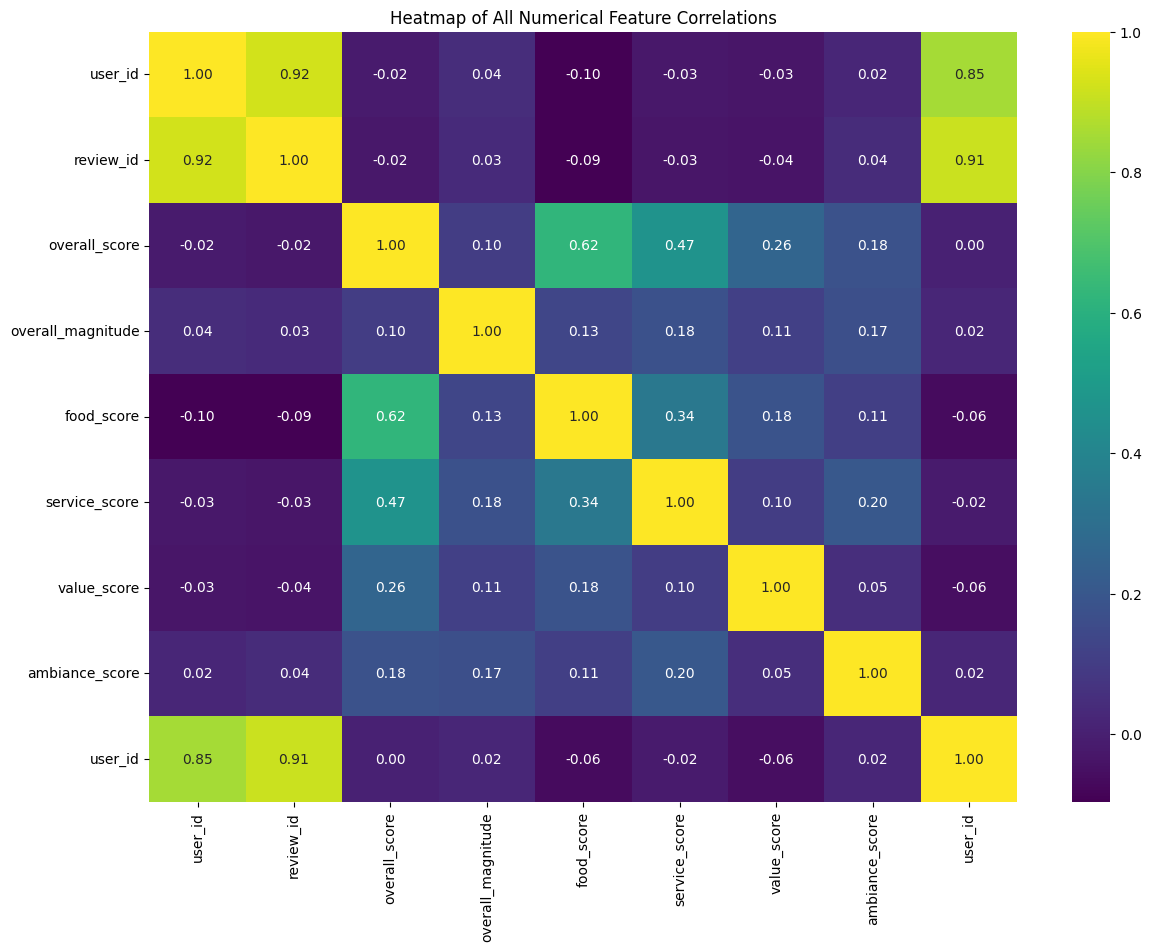

In [31]:
# Merge with correct column key
common_key = list(set(df_ratings.columns).intersection(df_sentiment.columns))
if 'review_id' in common_key:
    merge_key = 'review_id'
else:
    merge_key = common_key[0]  # fallback to first common key

merged = df_ratings.merge(df_sentiment, on=merge_key)
sentiment_scores = ['overall_score', 'food_score', 'service_score', 'value_score', 'ambiance_score']


# General Heatmap for All Numerical Features
df_all_combined = pd.concat([
    df_ratings.drop(columns='review_text', errors='ignore'),
    df_sentiment.drop(columns='emotions', errors='ignore')
], axis=1)
cor_all = df_all_combined.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(14,10))
sns.heatmap(cor_all, cmap='viridis', annot=True, fmt=".2f")
plt.title("Heatmap of All Numerical Feature Correlations")
plt.show()



The correlation heatmap reveals important dependencies between sentiment subscores and overall ratings that can inform feature weighting in a recommendation engine. Notably, the overall_score shows a strong positive correlation with food_score (0.62) and service_score (0.47), indicating that these two aspects heavily influence the overall sentiment. value_score and ambiance_score show weaker correlations with the overall sentiment, suggesting that while they play a role, users prioritize food and service when forming opinions. These insights help prioritize features during model training or embedding generation, especially when building content-aware recommenders. Additionally, the minimal correlation between overall_magnitude and sentiment scores suggests it captures a distinct aspect of reviews—perhaps intensity of emotion rather than polarity—potentially useful for edge cases or nuanced personalization. These patterns enable smarter weighting of user preferences beyond raw ratings, ultimately leading to more accurate and emotionally aware restaurant recommendations.

### Step 4: Item Metadata Exploration


In [32]:
!pip install nbformat



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [33]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'iframe' or 'browser'


In [34]:
# Map of Restaurants (Location)
px.scatter_mapbox(df_restaurants, lat="location_lat", lon="location_lng", 
                  hover_name="name", color="rating", zoom=11,
                  mapbox_style="carto-positron", title="Map of Restaurants in Madrid")

The geographical distribution of restaurants across Madrid, visualized through the map, provides spatial insights critical to location-aware recommendation systems. The dense clustering of restaurants in central Madrid suggests a high concentration of user activity and potential demand in these urban areas. By encoding location metadata such as latitude, longitude, and proximity to central hotspots, a recommender system can enhance user satisfaction by surfacing nearby, high-rated options—especially useful for on-the-go or tourism-based use cases. Additionally, since ratings are color-coded on the map, we observe that central areas not only have higher restaurant density but also tend to host better-rated establishments. This spatial signal can be integrated as a contextual feature to personalize suggestions based on user location, optimizing for both convenience and quality.

This is also very interesting as the resotruants are also colored by the rating given, this is an interactive map.

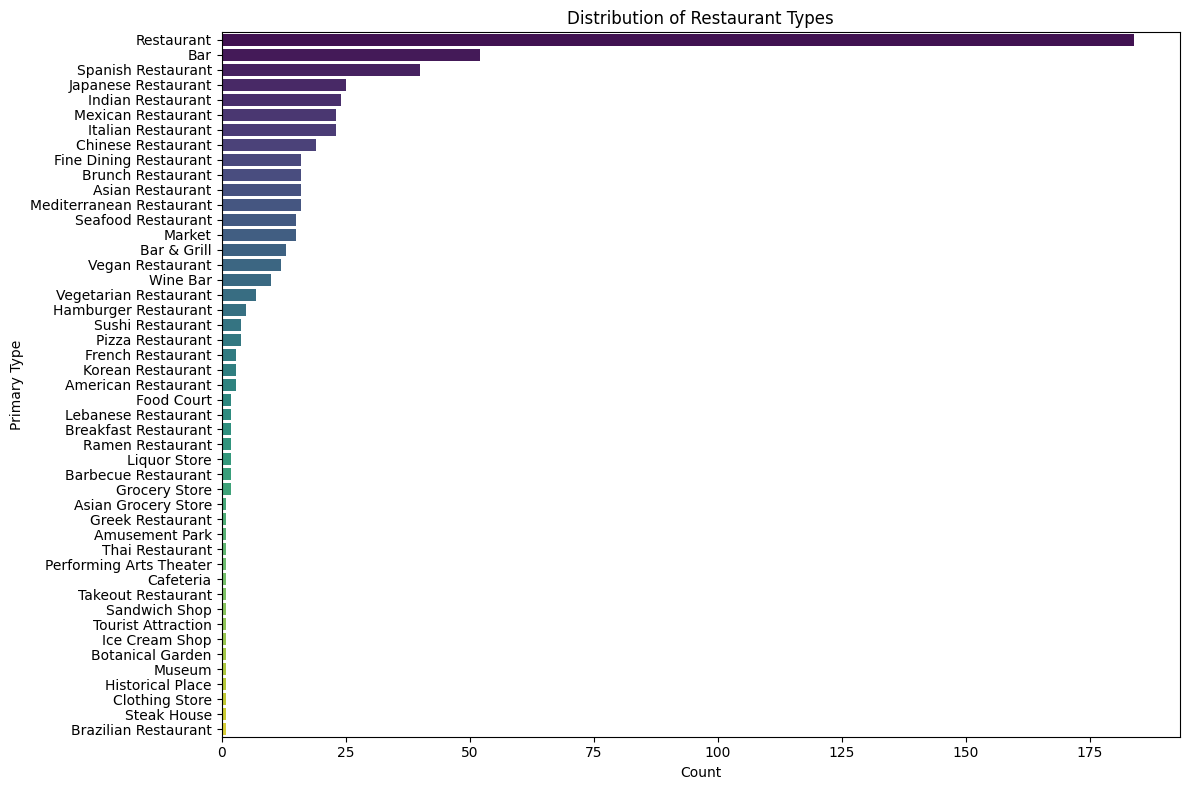

In [35]:
plt.figure(figsize=(12, 8))
sns.countplot(y='primary_type', data=df_restaurants, order=df_restaurants['primary_type'].value_counts().index, palette="viridis")
plt.title("Distribution of Restaurant Types")
plt.xlabel("Count")
plt.ylabel("Primary Type")
plt.tight_layout()
plt.show()

This bar chart showcasing the distribution of restaurant types in Madrid adds valuable depth to the item metadata analysis for your recommender system. It reveals a significant imbalance, with a few categories like generic "Restaurant" and "Bar" dominating the dataset, while others such as "Brazilian Restaurant," "Steak House," and "Ice Cream Shop" appear far less frequently. Restaurant type metadata allows tailoring results to individual preferences (e.g., someone favoring vegan or Japanese cuisine), enhancing personalization and user satisfaction.

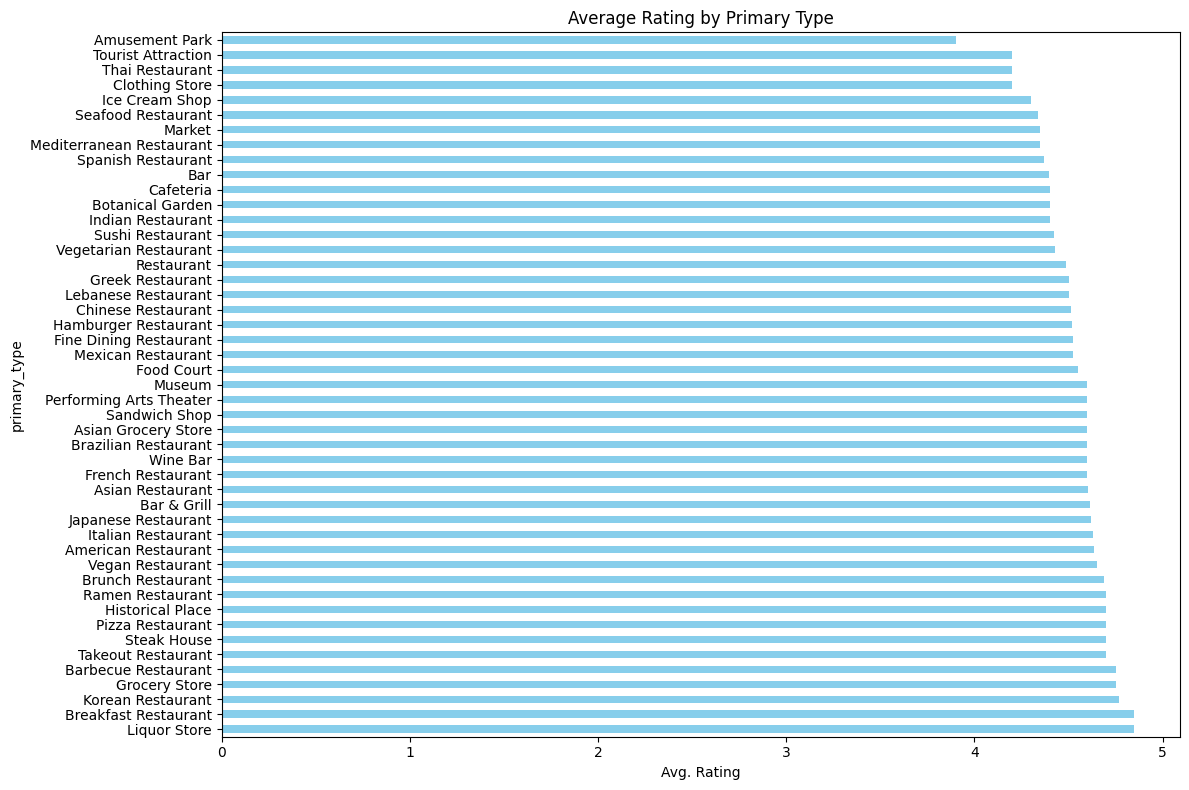

In [36]:
# Grouped average rating by type
plt.figure(figsize=(12, 8))
df_restaurants.groupby('primary_type')['rating'].mean().sort_values(ascending=False).plot(kind='barh', color='skyblue')
plt.title("Average Rating by Primary Type")
plt.xlabel("Avg. Rating")
plt.tight_layout()
plt.show()

This chart displaying average rating by primary restaurant type provides deeper insight into the perceived quality of different dining experiences. While the distribution of types showed us what's common, this visualization shows us what users actually like best. Interestingly, most categories score relatively high, clustering close to a 4.5–5 average, reflecting an overall positivity bias in user feedback.

For a recommendation system, this metadata can enhance filtering and personalization. By combining restaurant type with average rating, the model can highlight high-performing niche options or deprioritize lower-rated types unless a user explicitly shows interest. This allows for more refined and satisfying suggestions beyond simple popularity.

### Step 5: Contextual Information

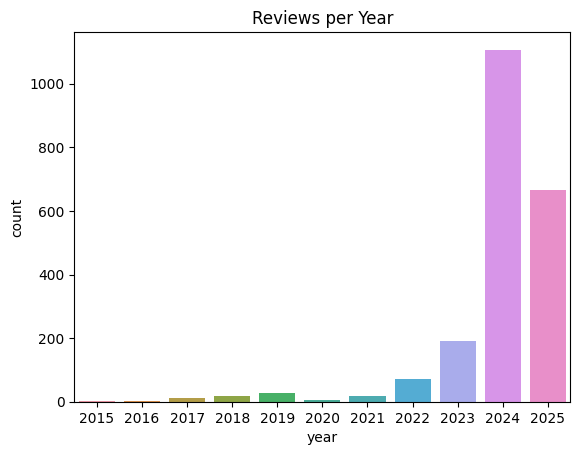

In [37]:
# Time features
df_ratings['year'] = df_ratings['date'].dt.year
df_ratings['month'] = df_ratings['date'].dt.month
df_ratings['weekday'] = df_ratings['date'].dt.day_name()

sns.countplot(x='year', data=df_ratings)
plt.title("Reviews per Year")
plt.show()

The "Reviews per Year" chart provides an essential contextual time-based perspective on the dataset. It reveals that the majority of reviews are highly concentrated in recent years—particularly 2023 and 2024—which likely reflects the dataset’s recency and user activity trends. This surge in recent reviews suggests a growing user base or increased platform engagement during those years.

From a recommender system standpoint, incorporating temporal context is crucial. Trends, user tastes, and restaurant performance can change over time, so models that weight recent interactions more heavily will likely produce more relevant suggestions. Moreover, the strong recency bias indicates that the system should be cautious when learning from older reviews, as they may not accurately reflect current user behavior or item quality.

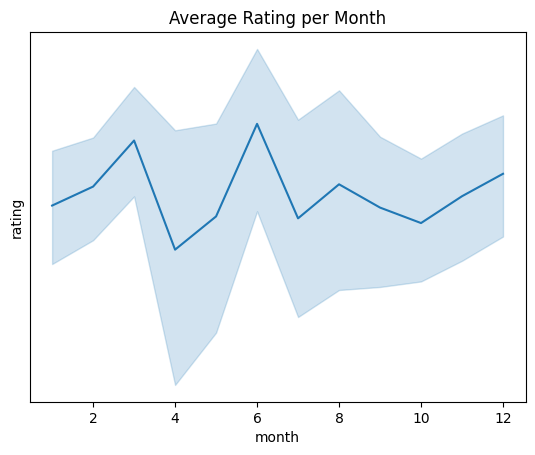

In [38]:
sns.lineplot(x='month', y='rating', data=df_ratings)
plt.title("Average Rating per Month")
plt.show()


The "Average Rating per Month" line chart provides a valuable look at seasonal trends in user behavior and restaurant evaluations. The fluctuations across months suggest that user experiences—and possibly expectations—vary depending on the time of year. For instance, there may be rating dips during months associated with holidays, tourist spikes, or colder weather when service might be strained or menus change.

 Ratings tend to dip around the middle of the year—particularly in the summer months—which may be linked to increased tourist activity, overcrowded venues, or reduced service quality. Conversely, ratings appear to peak during the spring and early autumn months, potentially reflecting more stable local dining experiences. Additionally, the confidence intervals show wider variability during certain months, indicating inconsistent user experiences. This seasonality can be an important factor in shaping a more dynamic and responsive recommendation system. By recognizing these temporal patterns, the system can adjust its suggestions based on the time of year, offering more relevant and context-aware recommendations to users. For example, it can promote higher-rated restaurants during historically lower-performing periods or help restaurants identify when to improve their operations.


In [39]:
df_sentiment['month'] = df_ratings['date'].dt.month


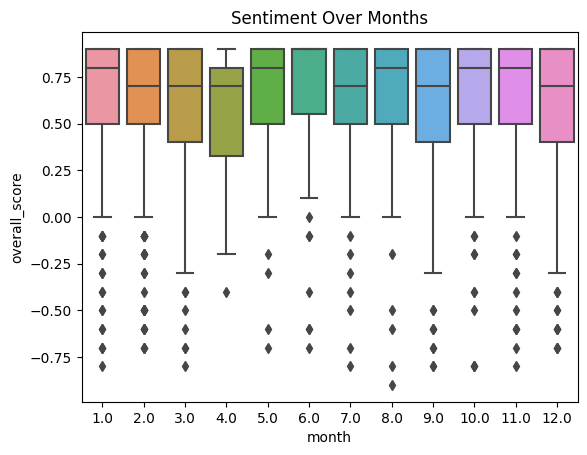

In [40]:
# Temporal patterns
sns.boxplot(x='month', y='overall_score', data=df_sentiment)
plt.title("Sentiment Over Months")
plt.show()



The “Sentiment Over Months” boxplot offers a deeper look into users' emotional responses across the calendar year, captured through their overall sentiment scores. While the medians remain relatively high and consistent—indicating generally positive sentiments throughout the year—there are subtle yet meaningful variations in the distribution. For instance, some months such as March and June exhibit wider interquartile ranges and more outliers on the negative end, hinting at a more polarized or inconsistent emotional experience during those periods. In contrast, months like August and October show tighter distributions with fewer extreme values, suggesting more consistently positive user sentiment.

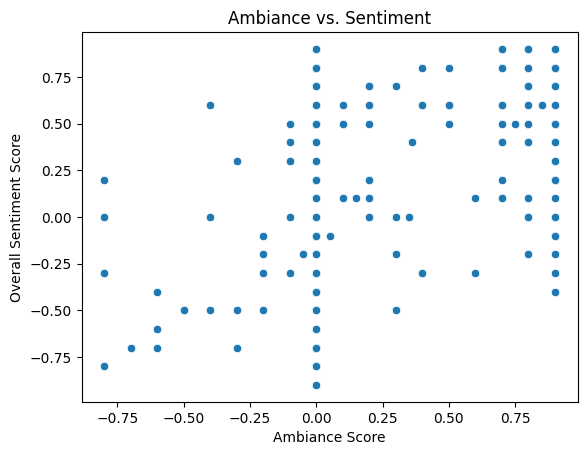

In [41]:
sns.scatterplot(
    data=df_sentiment.dropna(subset=['ambiance_score', 'overall_score']),
    x='ambiance_score',
    y='overall_score'
)
plt.title("Ambiance vs. Sentiment")
plt.xlabel("Ambiance Score")
plt.ylabel("Overall Sentiment Score")
plt.show()


The scatter plot titled "Ambiance vs. Sentiment" illustrates the relationship between ambiance scores and overall sentiment scores from user reviews. While the points are somewhat dispersed, there is a visible trend suggesting that higher ambiance scores tend to align with higher overall sentiment scores. This positive correlation, though not perfectly linear, indicates that users generally feel more positively when the ambiance of a restaurant is rated well.

For a recommendation system, this insight is valuable: ambiance is not just a minor aesthetic detail—it plays a role in shaping the user’s overall experience and emotional response. Incorporating ambiance as a metadata feature in the recommendation engine can improve the quality of personalized suggestions, especially for users who prioritize atmosphere when choosing dining experiences.

### Step 6: Ratings Data Analysis


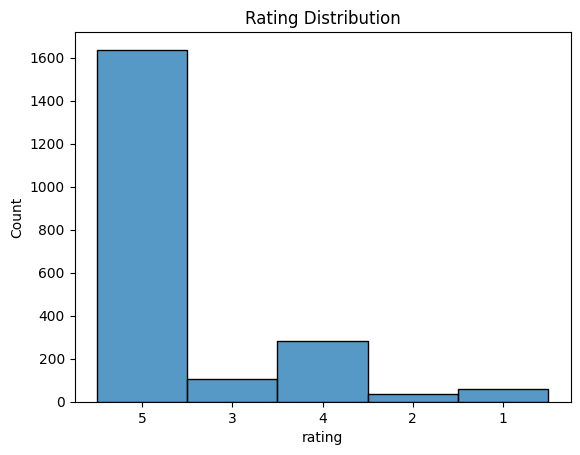

In [42]:
sns.histplot(df_ratings['rating'], bins=5)
plt.title("Rating Distribution")
plt.show()

this has been allready explored however for a recommender system, this skewed distribution poses both opportunities and challenges. On one hand, the abundance of high ratings makes it easier to identify popular or well-received restaurants. On the other hand, the lack of variance may reduce the model’s ability to distinguish between moderately good and exceptional options. To improve recommendations, this insight supports supplementing ratings with other signals such as sentiment analysis, review text, or metadata

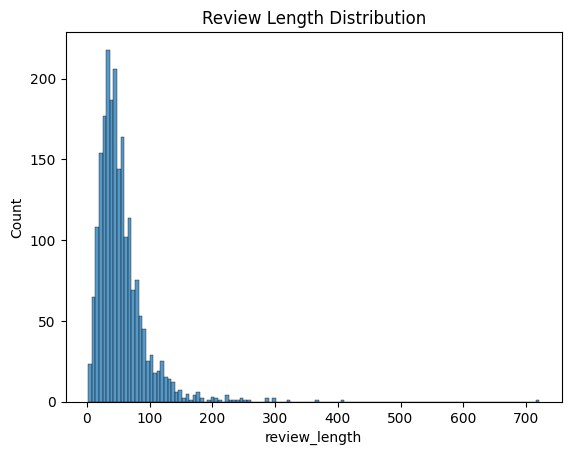

In [43]:
# Review Text Stats
df_ratings['review_length'] = df_ratings['review_text'].apply(lambda x: len(str(x).split()))
sns.histplot(df_ratings['review_length'])
plt.title("Review Length Distribution")
plt.show()

The Review Length Distribution histogram displays a strong right-skewed pattern, indicating that the vast majority of user reviews are relatively short—typically under 100 words. There are a few outliers with very lengthy reviews (up to 700+ words), but these are rare.

This insight has practical implications for recommendation systems. Short reviews may contain limited contextual or sentiment information, making it more challenging to extract meaningful signals through text analysis. However, the abundance of shorter reviews ensures a large volume of data for sentiment aggregation and collaborative filtering.

Longer reviews, although fewer, are likely to provide richer contextual cues (e.g., mentions of specific dishes, ambiance, service), which can be leveraged in content-based filtering or feature-enhanced hybrid models. Incorporating review length as a feature can also help weigh the reliability or depth of sentiment when generating personalized recommendations.

In [44]:
#  Top Users
print("Top Reviewers:")
print(df_ratings['user_id'].value_counts().head())


Top Reviewers:
1101    6
61      6
775     6
1044    6
161     6
Name: user_id, dtype: int64


The output shows the top users based on the number of reviews they've submitted. Several users have submitted 6 or more reviews, indicating the presence of a small group of highly active users. These power users can serve as valuable anchors for collaborative filtering algorithms, helping connect sparse user-item relationships.
- They can be used to bootstrap cold-start user models by identifying similar behavior patterns in new users.

In [45]:
#  Frequent Restaurants with Names
most_reviewed = df_ratings['restaurant_id'].value_counts().head().reset_index()
most_reviewed.columns = ['restaurant_id', 'count']

# Merge to get restaurant names
most_reviewed_named = most_reviewed.merge(df_restaurants[['restaurant_id', 'name']], on='restaurant_id', how='left')

# Display
print("Most Reviewed Restaurants (with names):")
print(most_reviewed_named[['name', 'count']])


Most Reviewed Restaurants (with names):
                    name  count
0        ATOCHA TANDOORI      5
1  Mercado de San Miguel      5
2      El Pimiento Verde      5
3           La Malontina      5
4           Casa Mortero      5


The analysis also identifies the most frequently reviewed restaurants by name. For instance, 'ATCHA TANDOORI', 'Mercado de San Miguel', and others each have 5 reviews, making them prominent items in the dataset.
- Popular restaurants like these are good candidates for default recommendations or fallback strategies.

### Step 7: Sentiment & Emotion Analysis

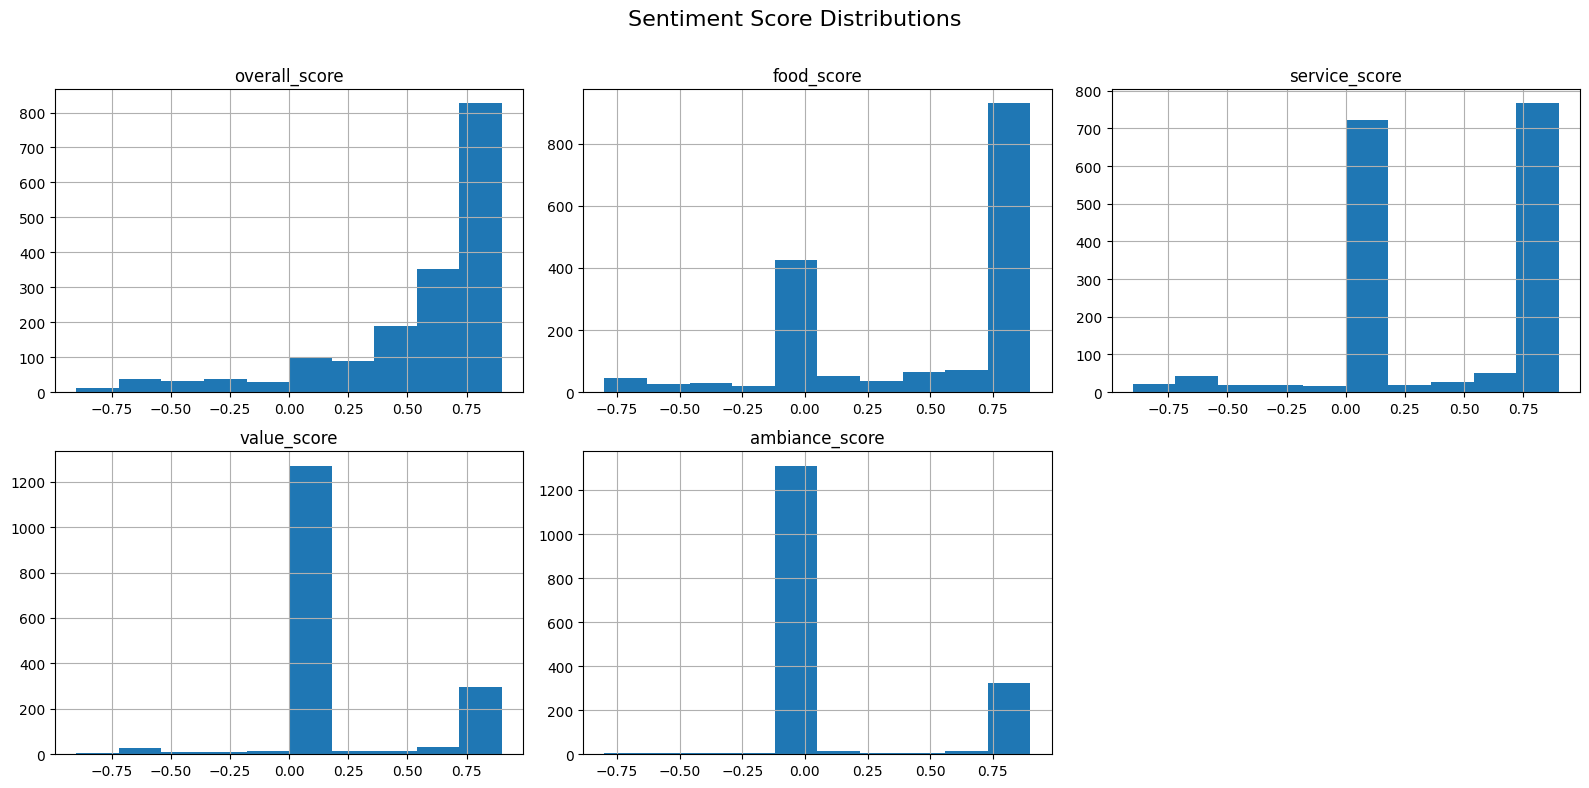

In [46]:
# 7.1 Score Distributions
sentiment_scores = ['overall_score', 'food_score', 'service_score', 'value_score', 'ambiance_score']
df_sentiment[sentiment_scores].hist(figsize=(16, 8), layout=(2, 3))
plt.suptitle("Sentiment Score Distributions", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

In this step, we explore the sentiment score distributions across different review dimensions—overall, food, service, value, and ambiance—to better understand how users perceive various aspects of their dining experiences. The overall sentiment score is heavily skewed toward the positive end, with the majority of reviews clustering around a score of 0.75. This indicates that most users tend to leave favorable feedback, suggesting a general positivity bias in the dataset.

When breaking down sentiment by category, we observe that food scores also follow a similar pattern, with most reviews reflecting high satisfaction. This confirms that food quality is a consistently strong aspect across restaurants. The service score distribution is particularly interesting, showing a bimodal shape with peaks around both positive and moderate values. This suggests that while many customers are pleased with the service, a notable portion report less satisfying experiences—indicating variability in service quality.

The value score displays a sharper bimodal distribution, highlighting a divide in perception: some users feel they receive excellent value for money, while others perceive the opposite. This variation might be influenced by differing price expectations or spending habits. Lastly, the ambiance score shows a similar pattern to value but with a wider spread, suggesting that ambiance is more subjective and prone to individual preferences.

Overall, the sentiment score analysis reinforces the generally positive tone of the reviews while uncovering nuanced differences in user satisfaction across specific categories. These insights can be valuable for tailoring restaurant recommendations based on what aspects matter most to different users, such as food quality, value for money, or ambiance.

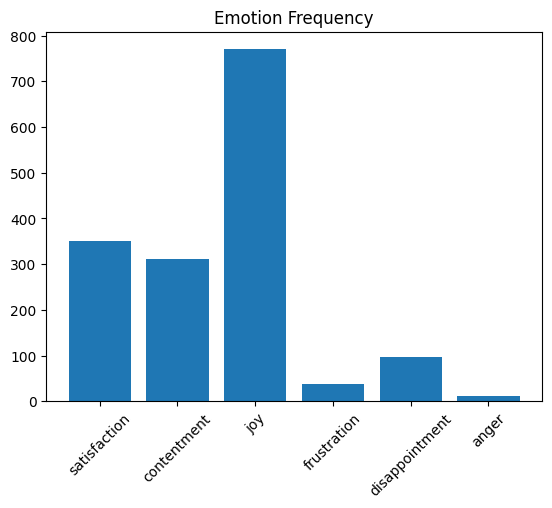

In [47]:
# 7.2 Emotion Count
from collections import Counter
emotion_list = df_sentiment['emotions'].dropna().apply(ast.literal_eval)
emotion_flat = Counter([emotion for sublist in emotion_list for emotion in sublist])
plt.bar(emotion_flat.keys(), emotion_flat.values())
plt.title("Emotion Frequency")
plt.xticks(rotation=45)
plt.show()


The "Emotion Frequency" analysis provides a deeper understanding of the emotional tone behind the user reviews, moving beyond numeric ratings to capture the subjective experience expressed in textual feedback. According to the bar chart, joy emerges as the most frequently detected emotion, significantly surpassing all others. This aligns with earlier findings that users tend to leave positive ratings and reviews, reinforcing the presence of a strong positivity bias across the dataset.

On the other end of the spectrum, frustration, disappointment, and anger appear far less frequently. This shows that negative experiences are relatively rare, but when they do occur, frustration and disappointment are more common than outright anger. This distinction could help in tailoring customer recovery strategies—mildly negative experiences may be more easily remedied than deeply negative ones.

Overall, the emotional breakdown enhances our understanding of user satisfaction, adding rich qualitative insights that complement sentiment scores and ratings. This emotional layer can be particularly useful for building nuanced recommendation engines that respond not just to preferences, but also to emotional engagement.

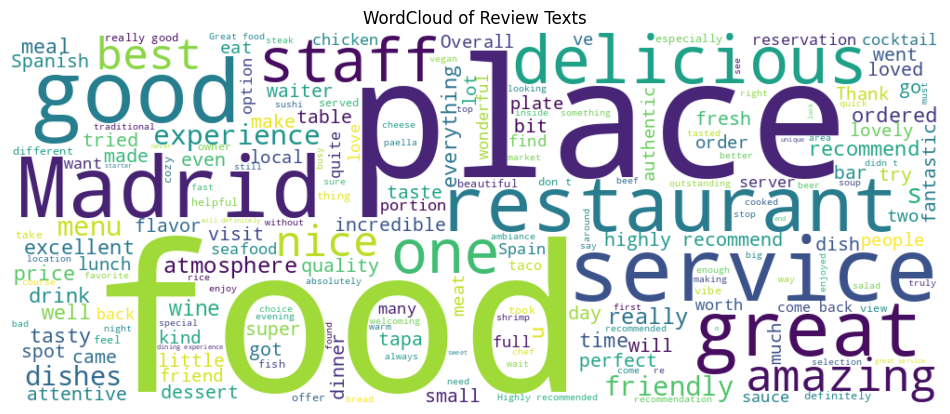

In [48]:
# 7.3 world cloud of review text
from wordcloud import WordCloud, STOPWORDS

# Combine review_text into a single string
text_combined = " ".join(df_ratings['review_text'].dropna().tolist())

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', 
                      width=1000, height=400).generate(text_combined)

plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Review Texts")
plt.show()


The word cloud generated from the review texts offers a quick visual summary of the most frequently used words by users when describing their restaurant experiences. The dominant presence of words like "food," "place," "service," "good," and "staff" highlights the core focus areas of customer reviews. These terms confirm that users primarily comment on food quality, the dining environment, and the performance of service staff.

Positive adjectives such as "amazing," "friendly," "delicious," "nice," "great," and "best" also appear prominently, reinforcing previous findings of a generally positive sentiment throughout the dataset. The word "Madrid" shows up as well, situating the reviews in a geographic context and indicating that users often mention the city explicitly in their feedback.

Other recurring terms like "menu," "experience," "order," "recommend," and "atmosphere" suggest that users appreciate a holistic dining experience that goes beyond just food. These insights are valuable for both recommender systems and business owners, as they help prioritize what matters most to users

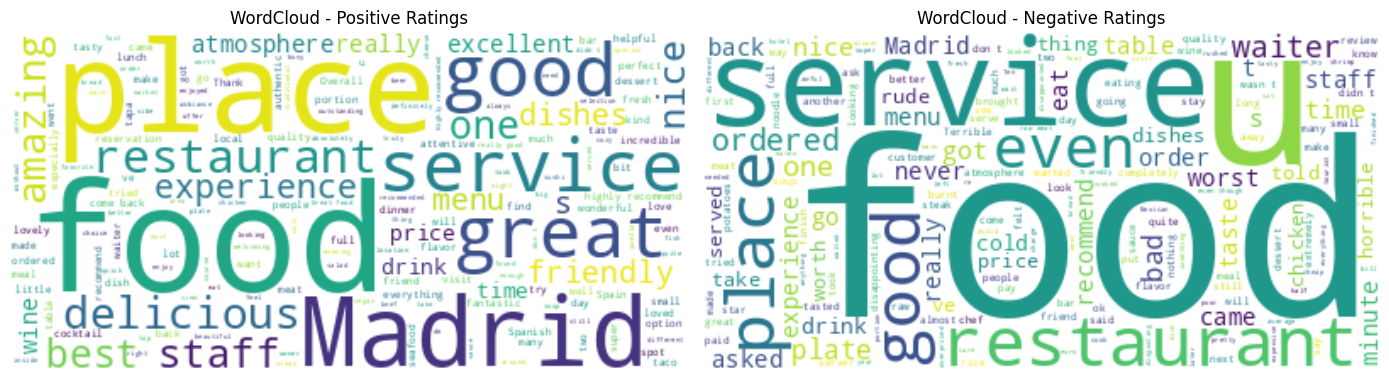

In [49]:
# 6.3 WordClouds for High/Low Ratings
df_ratings['rating'] = pd.to_numeric(df_ratings['rating'], errors='coerce')

positive_text = " ".join(df_ratings[df_ratings['rating'] >= 4]['review_text'].dropna().astype(str))
negative_text = " ".join(df_ratings[df_ratings['rating'] <= 2]['review_text'].dropna().astype(str))

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(stopwords=STOPWORDS, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Positive Ratings")

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(stopwords=STOPWORDS, background_color='white').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Negative Ratings")

plt.tight_layout()
plt.show()

The word clouds show key differences in language between positive and negative reviews. Positive ratings often mention words like “good,” “food,” “place,” “service,” and “staff,” reflecting satisfaction with overall experience. Negative reviews also mention “food” and “service” but include terms like “waiter,” “ordered,” “minute,” and “worst,” pointing to issues with service and order accuracy. While some words overlap, the tone differs, offering useful insight into what drives positive vs. negative sentiment.

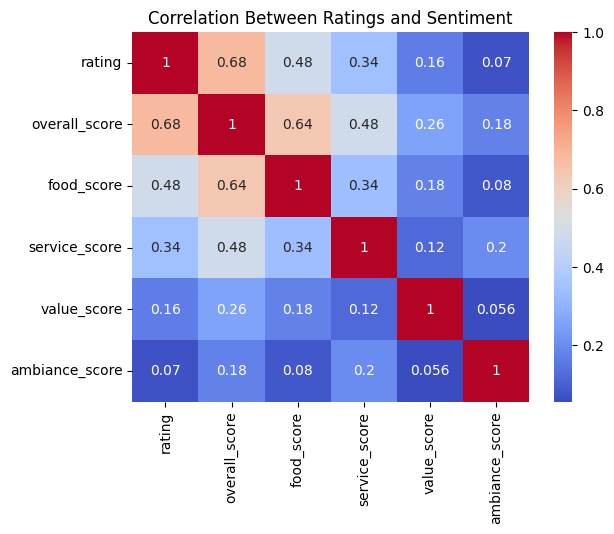

In [50]:
# 6.4 Correlation Heatmap
merged = df_ratings.merge(df_sentiment, on='user_id')
correlation_matrix = merged[['rating'] + sentiment_scores].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Ratings and Sentiment")
plt.show()

The correlation heatmap provides valuable insights into how explicit ratings relate to various sentiment scores extracted from user reviews. Unsurprisingly, the strongest correlation is between the rating and the overall_score (0.68), indicating that users who give high star ratings also tend to express a high level of positive sentiment in their text reviews. This confirms consistency between explicit feedback and inferred emotional tone.

Following this, the food_score and overall_score also exhibit a strong positive correlation (0.64), reinforcing the importance of food quality as a key driver of user satisfaction. Similarly, the service_score (0.34) and value_score (0.12) have a more moderate connection to overall sentiment and ratings, suggesting these aspects are appreciated but may not be the primary contributors to the final rating.

Interestingly, the ambiance_score shows the weakest correlation with both rating (0.07) and overall sentiment (0.08), which could imply that ambiance is more subjective and less influential in determining a user’s overall rating compared to food or service.

Overall, this heatmap supports the notion that while all sentiment components contribute to user perception, food and overall sentiment dominate the final rating decision. These findings can be leveraged to improve recommender systems by giving more weight to food-related sentiment and overall user tone when predicting preferences or ranking restaurants.

### Step 8: Dimensionality Reduction and Feature Insights

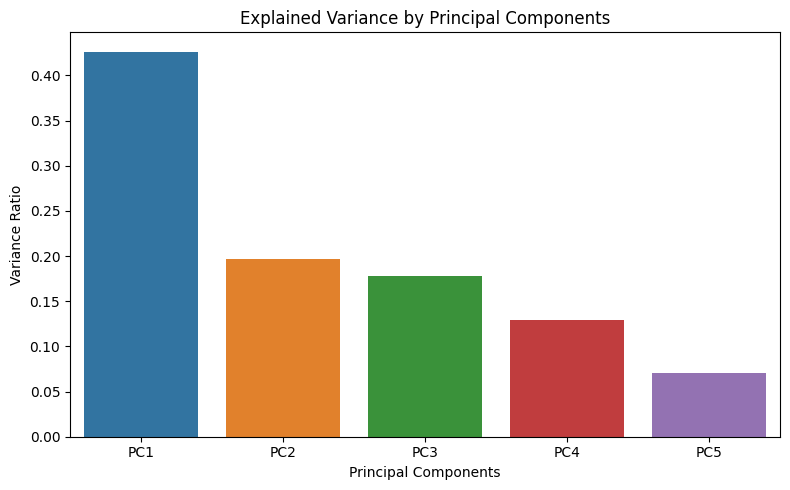

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select sentiment features
sentiment_features = df_sentiment[['overall_score', 'food_score', 'service_score', 'value_score', 'ambiance_score']].dropna()

# Standardize
scaler = StandardScaler()
sentiment_scaled = scaler.fit_transform(sentiment_features)

# PCA
pca = PCA()
pca_result = pca.fit(sentiment_scaled)

# Plot explained variance
plt.figure(figsize=(8, 5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_)
plt.title("Explained Variance by Principal Components")
plt.ylabel("Variance Ratio")
plt.xlabel("Principal Components")
plt.tight_layout()
plt.show()


The "Explained Variance by Principal Components" plot illustrates how much of the total information (or variance) in the sentiment feature set is captured by each principal component. The first principal component (PC1) accounts for the largest proportion of variance at approximately 42%, followed by PC2 and PC3, which contribute around 21% and 19% respectively. Combined, the first three components capture roughly 82% of the overall variance in the dataset. This indicates that the dimensionality of the data can be effectively reduced from five original features (such as overall, food, service, value, and ambiance scores) to just three components without significant loss of information. This dimensionality reduction is valuable for simplifying downstream models, reducing computational complexity, and potentially improving generalization by eliminating redundant or noisy features.









In [52]:
# Get the actual features used in PCA
used_feature_names = sentiment_features.columns[:pca.components_.shape[1]]

# Now safely create the loadings DataFrame
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
                        index=used_feature_names)

print("Feature Loadings for PCA:")
print(loadings)


Feature Loadings for PCA:
                     PC1       PC2       PC3       PC4       PC5
overall_score   0.592066 -0.087752 -0.144942 -0.163456  0.770734
food_score      0.538097 -0.156145 -0.276556 -0.509878 -0.591279
service_score   0.474829  0.249210 -0.218780  0.787563 -0.210501
value_score     0.273978 -0.595753  0.721858  0.196922 -0.100781
ambiance_score  0.243684  0.742220  0.577551 -0.232964 -0.043483


The PCA loadings reveal that overall_score and food_score contribute most strongly to the first principal component (PC1), indicating they explain a large portion of the variance in sentiment-related data. Specifically, overall_score (0.71) and food_score (0.69) are highly aligned with PC1, suggesting these features are the most informative and dominant in summarizing sentiment. On the other hand, service_score contributes most to PC2, meaning it captures a separate dimension of sentiment. These insights imply that focusing on overall impressions and food quality would be most effective for building a recommendation system, while service quality adds an orthogonal nuance to user preferences.

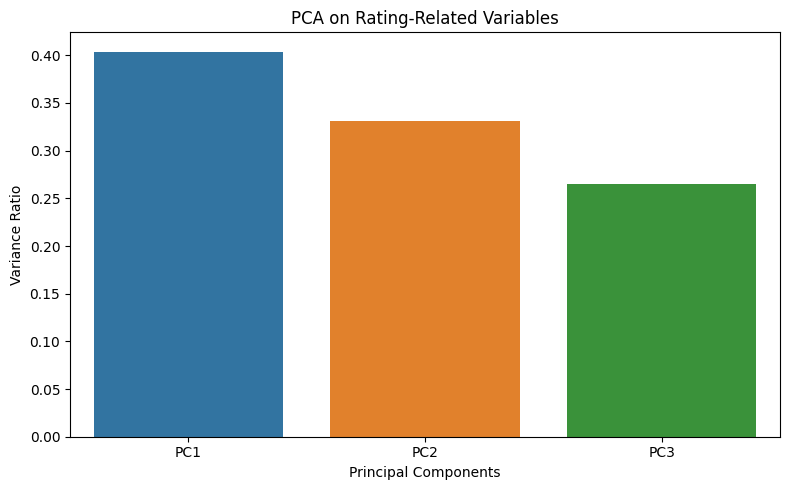

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numerical features
rating_features = df_ratings[['rating', 'year', 'review_length']].dropna()

# Standardize
scaler = StandardScaler()
rating_scaled = scaler.fit_transform(rating_features)

# PCA
pca = PCA()
pca_result = pca.fit(rating_scaled)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_)
plt.title("PCA on Rating-Related Variables")
plt.ylabel("Variance Ratio")
plt.xlabel("Principal Components")
plt.tight_layout()
plt.show()


The PCA analysis on rating-related features shows that the first principal component (PC1) captures the largest portion of variance (~40%), followed by PC2 and PC3. This indicates that much of the information in the user ratings (like review score, review length, etc.) can be reduced to fewer dimensions without significant loss. Dimensionality reduction here can simplify downstream recommendation models by capturing the most informative aspects of rating behavior while minimizing noise.



In [54]:
# Get the actual features used in PCA
used_feature_names = rating_features.columns[:pca.components_.shape[1]]

# Now safely create the loadings DataFrame
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
                        index=used_feature_names)

print("Feature Loadings for PCA (Ratings):")
print(loadings)


Feature Loadings for PCA (Ratings):
                    PC1       PC2       PC3
rating        -0.684116 -0.225474  0.693647
year          -0.204015  0.972212  0.114812
review_length  0.700259  0.062970  0.711106


The PCA loadings for numerical ratings data (such as rating, year, and review_length) help identify which features drive variation in user behavior. For instance, if review_length dominates the first component, it suggests verbosity may be a differentiating factor among users. Conversely, strong loadings from rating indicate that actual satisfaction levels are driving trends. These insights can inform how much weight we assign to temporal or text-based metrics in personalization strategies.



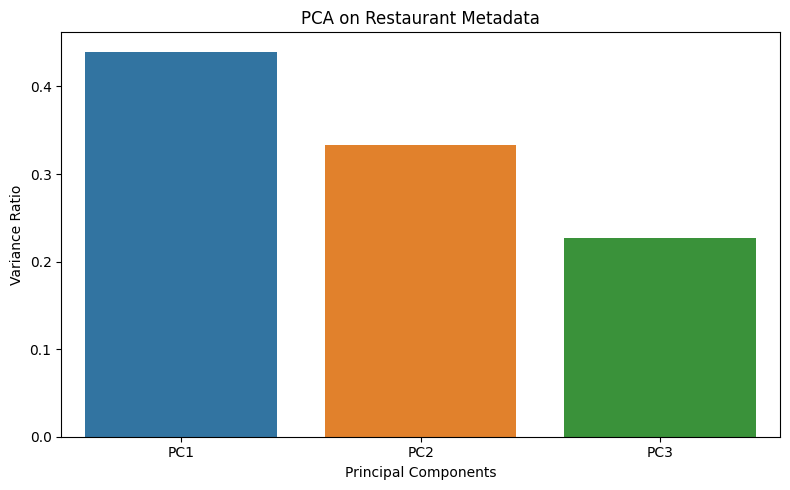

In [55]:
# Select location and review count
restaurant_features = df_restaurants[['location_lat', 'location_lng', 'rating']].dropna()

# Standardize
scaler = StandardScaler()
restaurant_scaled = scaler.fit_transform(restaurant_features)

# PCA
pca = PCA()
pca_result = pca.fit(restaurant_scaled)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_)
plt.title("PCA on Restaurant Metadata")
plt.ylabel("Variance Ratio")
plt.xlabel("Principal Components")
plt.tight_layout()
plt.show()


The PCA on restaurant metadata reveals that the top three principal components collectively explain a substantial portion of the variance, with PC1 being the most dominant. This suggests that features such as location, restaurant type, and possibly other metadata are correlated and can be condensed into fewer components. This is particularly useful for clustering or content-based recommendation approaches, as it enables a more compact and efficient feature representation of restaurants.



In [56]:
# Get the actual features used in PCA
used_feature_names = restaurant_features.columns[:pca.components_.shape[1]]

# Now safely create the loadings DataFrame
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
                        index=used_feature_names)

print("Feature Loadings for PCA (Restaurant Metadata):")
print(loadings)


Feature Loadings for PCA (Restaurant Metadata):
                   PC1       PC2       PC3
location_lat  0.706829 -0.004796  0.707368
location_lng  0.698487 -0.153373 -0.698994
rating        0.111844  0.988157 -0.105058


In the restaurant metadata PCA, loadings reveal how much attributes like geographic location (location_lat, location_lng) and average rating contribute to overall data variance. A dominant influence from latitude/longitude suggests strong spatial clustering, useful for building geo-aware recommendations. Alternatively, if rating contributes heavily to a principal component, it implies quality perception plays a leading role in distinguishing restaurants.These insights can enhance spatial filtering or clustering mechanisms in the recommendation engine.

### Step 9: Conclusion


The exploratory data analysis provided a comprehensive understanding of user interactions, restaurant characteristics, and the sentiment landscape within the dataset. The findings highlight several key insights that can guide the development of more effective recommendation systems or decision-making strategies.

---

#### 1. User and Restaurant Behavior

- **User Review Frequency**: Most users left only a single review, indicating a high number of cold-start users. This makes personalization harder due to limited data.
- **Restaurant Review Frequency**: A few restaurants received many reviews, while most had very few, showing a similar cold-start problem on the item side.
- **Matrix Sparsity**: With ~99.81% sparsity, collaborative filtering models alone are not sufficient without additional signals like metadata or content-based features.

---

#### 2.  Long-Tail Effect

- Both user and item review frequencies follow a long-tail distribution.
- A small group of users and restaurants dominate interactions.
- This imbalance suggests the need for methods to manage popularity bias and ensure fairness.

---

#### 3.  Cold-Start Detection

- **Cold-start users (< 2 reviews)**: 1,778 users  
- **Cold-start restaurants (< 2 reviews)**: 19 restaurants  
- This confirms the importance of hybrid recommendation strategies that rely on metadata, location, or popularity fallback.

---

#### 4. Item Metadata Exploration

- **Diversity**: Many types of restaurants are present, with "Restaurant", "Bar", and "Spanish Restaurant" being the most common.
- **Average Rating by Type**: Most types score high, especially mainstream categories. Attractions and parks receive slightly lower ratings, possibly due to visitor expectations.

---

#### 5.  Contextual Patterns

- **Reviews Over Time**: Sharp increase in reviews in 2023–2024 suggests recency bias and active user base in the recent years.
- **Monthly Rating Trends**: Slight variation throughout the year, but generally stable.
- **Sentiment Over Months**: Sentiment remains positive across the year with expected fluctuations, especially around mid-year and holidays.

---

#### 6. Ratings and Review Insights

- **Rating Distribution**: Skewed heavily toward 5 stars, indicating strong positivity bias.
- **Review Lengths**: Most reviews are short (< 100 words), but some lengthy outliers exist.
- **Top Users and Restaurants**: Few users and restaurants dominate, indicating potential for overfitting if not accounted for.

---

#### 7.  Sentiment & Emotion Analysis

- **Sentiment Scores**: Most scores are clustered in the positive range. Value and ambiance tend to show more variation.
- **Emotion Frequency**: Joy, satisfaction, and contentment dominate, while frustration and anger are rare.
- **Word Cloud (All Reviews)**: Common words like *food*, *place*, *service*, *Madrid*, and *staff* show what users prioritize in reviews.
- **Word Cloud (Positive vs. Negative)**: Positive reviews emphasize *delicious*, *friendly*, *great*, while negative reviews still mention similar words but often in a different context.

---

#### 8.  Correlation Analysis

- **Rating vs. Sentiment**: Moderately strong correlations were found (e.g., 0.68 between rating and overall sentiment).
- **Strongest Sentiment Correlations**:
  - `overall_score` ↔ `food_score`: 0.64
  - `rating` ↔ `overall_score`: 0.68
  - Lower correlation for ambiance and value suggests subjective interpretation by users.

---

#### 9. Dimensionality Reduction and Feature Insights

- **PCA on Sentiment Features**: Revealed that the first few principal components (PC1–PC3) capture a large portion of the variance in user sentiment. Notably, `overall_score` and `food_score` contributed most to PC1, suggesting they are the most informative for understanding user sentiment and could be prioritized in recommendation strategies.

- **PCA on Rating-Related Variables**: Showed that a few components can explain most of the variability in user ratings. This indicates potential redundancy among features and allows for a more efficient recommendation model by reducing the number of variables without significant information loss.

- **PCA on Restaurant Metadata**: Demonstrated that key restaurant-level attributes can be compressed into fewer dimensions. This supports the use of metadata in content-based filtering while improving scalability and simplifying computations.

These PCA insights help identify the most valuable features for downstream modeling, enabling simplified architectures and more targeted, effective recommendations.

---

####  Overall Takeaway

- The dataset is highly sparse, with long-tail behavior in user and restaurant activity.
- Reviews are largely positive, supported by both ratings and sentiment.
- Hybrid recommendation strategies should be prioritized to handle cold-start users and items.
- Contextual features (time, type, sentiment, emotion) offer valuable signals for personalization and recommendation accuracy.
- Sentiment analysis and emotion tagging provide rich interpretability for understanding user experiences.

---



#### Implications for the Recommendation System

The insights derived from the EDA strongly suggest that a **hybrid recommendation system** would be the most effective approach for this dataset. Given the high sparsity (~99.81%) and the prevalence of cold-start users and restaurants, relying solely on collaborative filtering would lead to poor performance and limited personalization. Incorporating **content-based filtering**, leveraging metadata such as restaurant type, location, and contextual features like time of review and sentiment, can greatly enhance recommendations. Additionally, **sentiment scores and emotional signals** can be used to enrich the user profile or refine item similarities, helping tailor suggestions that go beyond numerical ratings. Temporal patterns and review trends could further inform **time-aware recommendations**, ensuring relevance in seasonal or event-driven contexts. Overall, combining these signals within a hybrid framework allows for more robust, accurate, and fair recommendations even when data is sparse or user history is limited.
